In [95]:
import numpy as np
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt

In [96]:
def lognormal(s, s0, r, sigma, t):
    mu = -(np.log(s) - np.log(s0) - (r - 0.5 * sigma**2) * t) ** 2 / (2 * sigma**2 * t)
    sigma_t = 1 / (s * sigma * np.sqrt(2 * np.pi * t))
    
    
    return sigma_t * np.exp(mu)

In [97]:
def d(sigma, s, k,r,t):
    d1 = (np.log(s / k) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return d1, d2
    

In [104]:
s0 = 906.23
r = 0.01988605
t = 5/252
sigma = 0.193716

s = np.linspace(925, 1050, 1000)

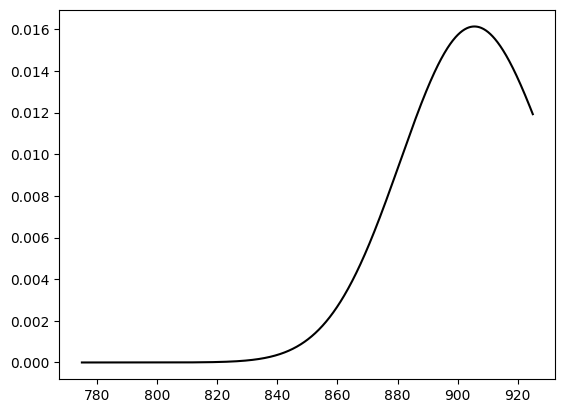

In [99]:
plt.plot(s, lognormal(s ,s0, r, sigma, t), 'k')

In [105]:
np.trapz(lognormal(s ,s0, r, sigma, t), s)

0.22648072478813583

In [101]:
d120 = d(sigma, 765, 900, r, t)[1]
d100 = d(sigma, 765, 765, r, t)[1]

abs(norm.cdf(d120) - norm.cdf(d100))

0.5003257977985989

In [103]:
for i in range(775, 1051, 25):
    print(f'{i} : {round(norm.cdf(d(sigma, s0, i, r, t)[0]), 4)}')

775 : 1.0
800 : 1.0
825 : 0.9997
850 : 0.9912
875 : 0.9055
900 : 0.6106
925 : 0.2348
950 : 0.0445
975 : 0.004
1000 : 0.0002
1025 : 0.0
1050 : 0.0
